# Road Accidents 2022
- By **Arshia Goshtasbi**
- Github: [@Arshiagosh](https://github.com/Arshiagosh)


Description:
This comprehensive dataset provides detailed information on road accidents reported over multiple years. The dataset encompasses various attributes related to accident status, vehicle and casualty references, demographics, and severity of casualties. It includes essential factors such as pedestrian details, casualty types, road maintenance worker involvement, and the Index of Multiple Deprivation (IMD) decile for casualties' home ar\eThis dataset provides valuable insights for analyzing road accidents, identifying trends, and implementing safety measures to reduce casualties and enhance road safety. Researchers, policymakers, and analysts can leverage this dataset for evidence-based decision-making and improving overall road transportation systems.road transportation systems.


## Analyse

### Importing Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Libraries for Visualization
import folium
from geopy.geocoders import Nominatim
from collections import Counter


### Data Loading and Preprocessing

- **Purpose:** Load the dataset and perform initial preprocessing steps such as removing duplicates and irrelevant columns.

- **Actions:**
    - Loaded the main dataset.
    - Removed duplicates and irrelevant columns.
    - Displayed information about the dataset.


In [2]:
# Load the data guide and the main dataset
df = pd.read_csv('statistics.csv')

# Data Preprocessing
df.drop_duplicates(inplace=True)
df.drop(inplace=True, columns=['status','vehicle_reference','casualty_reference','accident_index', 'accident_year','accident_reference'])
df = df[~df.isin([-1]).any(axis=1)]

# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54287 entries, 0 to 61351
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   casualty_class                      54287 non-null  int64 
 1   sex_of_casualty                     54287 non-null  int64 
 2   age_of_casualty                     54287 non-null  int64 
 3   age_band_of_casualty                54287 non-null  int64 
 4   casualty_severity                   54287 non-null  int64 
 5   pedestrian_location                 54287 non-null  int64 
 6   pedestrian_movement                 54287 non-null  int64 
 7   car_passenger                       54287 non-null  int64 
 8   bus_or_coach_passenger              54287 non-null  int64 
 9   pedestrian_road_maintenance_worker  54287 non-null  int64 
 10  casualty_type                       54287 non-null  int64 
 11  casualty_home_area_type             54287 non-null  int64 


#### Columns:
*Status*: The status of the accident (e.g., reported, under investigation).\
*Accident_Index*: A unique identifier for each reported accident.\
*Accident_Year*: The year in which the accident occurred.\
*Accident_Reference*: A reference number associated with the accident.\
*Vehicle_Reference*: A reference number for the involved vehicle in the accident.\
*Casualty_Reference*: A reference number for the casualty involved in the accident.\
*Casualty_Class*: Indicates the class of the casualty (e.g., driver, passenger, pedestrian).\
*Sex_of_Casualty*: The gender of the casualty (male or female).\
*Age_of_Casualty*: The age of the casualty.\
*Age_Band_of_Casualty*: Age group to which the casualty belongs (e.g., 0-5, 6-10, 11-15).\
*Casualty_Severity*: The severity of the casualty's injuries (e.g., fatal, serious, slight).\
*Pedestrian_Location*: The location of the pedestrian at the time of the accident.\
*Pedestrian_Movement*: The movement of the pedestrian during the accident.\
*Car_Passenger*: Indicates whether the casualty was a car passenger at the time of the accident (yes or no).\
*Bus_or_Coach_Passenger*: Indicates whether the casualty was a bus or coach passenger (yes or no).\
*Pedestrian_Road_Maintenance_Worker*: Indicates whether the casualty was a road maintenance worker (yes or no).\
*Casualty_Type*: The type of casualty (e.g., driver/rider, passenger, pedestrian).\
*Casualty_Home_Area_Type*: The type of area in which the casualty resides (e.g., urban, rural).\
*Casualty_IMD_Decile*: The IMD decile of the area where the casualty resides (a measure of deprivation).\
*LSOA_of_Casualty*: The Lower Layer Super Output Area (LSOA) associated with the casualty's location.

### Data Dictionary

- **Purpose:** Define dictionaries to map numeric codes to their corresponding categorical values for better interpretation of the dataset.

- **Actions:**
    - Created dictionaries to map various codes in the dataset to their meanings.


In [3]:
casualty_class = {
                    '1':'Driver or Rider',
                    '2':'Passenger',
                    '3':'Pedestrian'}
sex_of_casualty = {
                    '1':'Male',
                    '2':'Female',
                    '9':'unknown (self reported)',
                    '-1':'Data missing or out of range'}
age_band_of_casualty = {
                    '1':'0 - 5',
                    '2':'6 - 10',
                    '3':'11 - 15',
                    '4':'16 - 20',
                    '5':'21 - 25',
                    '6':'26 - 35',
                    '7':'36 - 45',
                    '8':'46 - 55',
                    '9':'56 - 65',
                    '10':'66 - 75',
                    '11':'Over 75',
                    '-1':'Data missing or out of range'}
casualty_severity = {'1':'Fatal',
                    '2':'Serious',
                    '3':'Slight'}
pedestrian_location = {
                    '0': 'Not a Pedestrian',
                    '1': 'Crossing on pedestrian crossing facility',
                    '2': 'Crossing in zig-zag approach lines',
                    '3': 'Crossing in zig-zag exit lines',
                    '4': 'Crossing elsewhere within 50m. of pedestrian crossing',
                    '5': 'In carriageway, crossing elsewhere',
                    '6': 'On footway or verge',
                    '7': 'On refuge, central island or central reservation',
                    '8': 'In centre of carriageway - not on refuge, island or central reservation',
                    '9': 'In carriageway, not crossing',
                    '10': 'Unknown or other',
                    '-1': 'Data missing or out of range'}
pedestrian_movement = {
                    '0': 'Not a Pedestrian',
                    '1': "Crossing from driver's nearside",
                    '2': 'Crossing from nearside - masked by parked or stationary vehicle',
                    '3': "Crossing from driver's offside",
                    '4': 'Crossing from offside - masked by parked or stationary vehicle',
                    '5': 'In carriageway, stationary - not crossing  (standing or playing)',
                    '6': 'In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle',
                    '7': 'Walking along in carriageway, facing traffic',
                    '8': 'Walking along in carriageway, back to traffic',
                    '9': 'Unknown or other',
                    '-1': 'Data missing or out of range'}
car_passenger = {
                    '0': 'Not car passenger',
                    '1': 'Front seat passenger',
                    '2': 'Rear seat passenger',
                    '9': 'Unknown (self reported)',
                    '-1': 'Data missing or out of range'}
bus_or_coach_passenger = {
                    '0': 'Not a bus or coach passenger',
                    '1': 'Boarding',
                    '2': 'Alighting',
                    '3': 'Standing passenger',
                    '4': 'Seated passenger',
                    '9': 'Unknown (self reported)',
                    '-1': 'Data missing or out of range'}
pedestrian_road_maintenance_worker = {
                    '0': 'No / Not applicable',
                    '1': 'Yes',
                    '2': 'Not Known',
                    '3': 'Probable',
                    '-1': 'Data missing or out of range'}
casualty_type = {
                    '0': 'Pedestrian',
                    '1': 'Cyclist',
                    '2': 'Motorcycle 50cc and under rider or passenger',
                    '3': 'Motorcycle 125cc and under rider or passenger',
                    '4': 'Motorcycle over 125cc and up to 500cc rider or passenger',
                    '5': 'Motorcycle over 500cc rider or passenger',
                    '8': 'Taxi/Private hire car occupant',
                    '9': 'Car occupant',
                    '10': 'Minibus (8 - 16 passenger seats) occupant',
                    '11': 'Bus or coach occupant (17 or more pass seats)',
                    '16': 'Horse rider',
                    '17': 'Agricultural vehicle occupant',
                    '18': 'Tram occupant',
                    '19': 'Van / Goods vehicle (3.5 tonnes mgw or under) occupant',
                    '20': 'Goods vehicle (over 3.5t. and under 7.5t.) occupant',
                    '21': 'Goods vehicle (7.5 tonnes mgw and over) occupant',
                    '22': 'Mobility scooter rider',
                    '23': 'Electric motorcycle rider or passenger',
                    '90': 'Other vehicle occupant',
                    '97': 'Motorcycle - unknown cc rider or passenger',
                    '98': 'Goods vehicle (unknown weight) occupant',
                    '99': 'Unknown vehicle type (self rep only)',
                    '103': 'Motorcycle - Scooter (1979-1998)',
                    '104': 'Motorcycle (1979-1998)',
                    '105': 'Motorcycle - Combination (1979-1998)',
                    '106': 'Motorcycle over 125cc (1999-2004)',
                    '108': 'Taxi (excluding private hire cars) (1979-2004)',
                    '109': 'Car (including private hire cars) (1979-2004)',
                    '110': 'Minibus/Motor caravan (1979-1998)',
                    '113': 'Goods over 3.5 tonnes (1979-1998)',
                    '-1': 'Data missing or out of range'}
casualty_home_area_type = {
                    '1': 'Urban area',
                    '2': 'Small town',
                    '3': 'Rural',
                    '-1': 'Data missing or out of range'}
casualty_imd_decile = {
                    '1': 'Most deprived 10%',
                    '2': 'More deprived 10-20%',
                    '3': 'More deprived 20-30%',
                    '4': 'More deprived 30-40%',
                    '5': 'More deprived 40-50%',
                    '6': 'Less deprived 40-50%',
                    '7': 'Less deprived 30-40%',
                    '8': 'Less deprived 20-30%',
                    '9': 'Less deprived 10-20%',
                    '10': 'Least deprived 10%',
                    '-1': 'Data missing or out of range'}

### Correlation Analysis

- **Purpose:** Investigate the correlation between different features in the dataset.

- **Actions:**
    - Calculated the correlation matrix for selected columns.
    - Plotted a heatmap to visualize the correlation matrix.


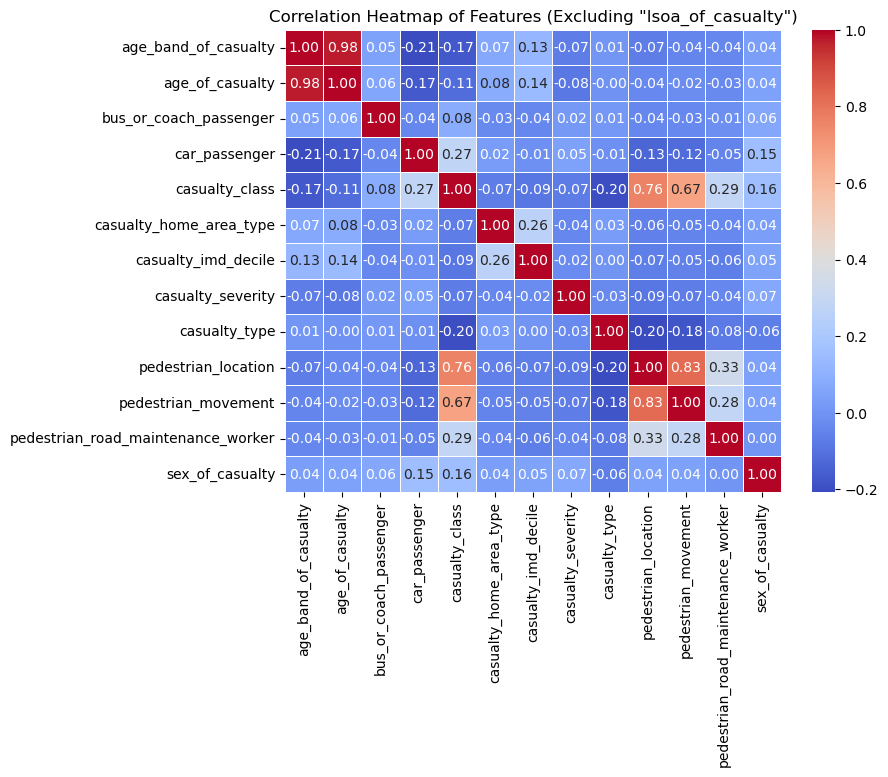

In [4]:
# Calculate the correlation matrix and plot a heatmap
columns_for_correlation = df.columns.difference(['lsoa_of_casualty'])
correlation_matrix = df[columns_for_correlation].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features (Excluding "lsoa_of_casualty")')
plt.show()

### Casualty Class and Severity Analysis

- **Purpose:** Explore the distribution of casualties based on casualty class and severity.

- **Actions:**
    - Grouped the data by casualty class and severity.
    - Plotted a stacked bar chart to visualize the distribution.
    - Added percentage labels to each bar to show the proportion of each severity level within each casualty class.


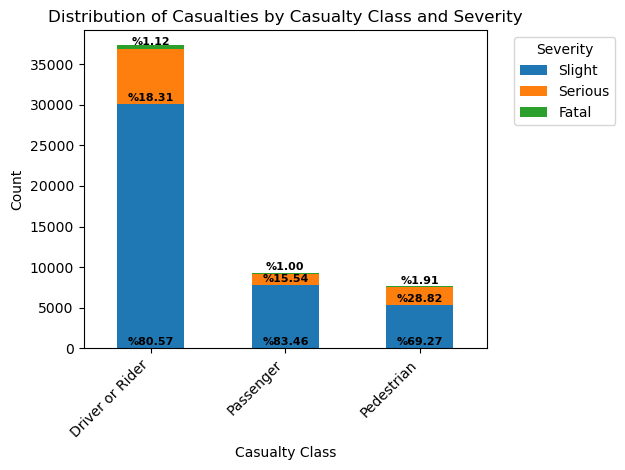

In [5]:
# Group data by casualty class and severity, and plot a stacked bar chart
grouped_data = df.groupby(['casualty_class', 'casualty_severity']).size().unstack(fill_value=0)
grouped_data.columns = [casualty_severity[str(col)] for col in grouped_data.columns]
grouped_data.index = [casualty_class[str(idx)] for idx in grouped_data.index]
grouped_data = grouped_data.iloc[:, ::-1]

ax = grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Casualty Class')
plt.ylabel('Count')
plt.title('Distribution of Casualties by Casualty Class and Severity')
plt.xticks(rotation=45, ha='right')
# Add percentage labels to each bar
sum_of_each_bar = []
for i in range(0,3):
    sum_of_each_bar.append((ax.patches[i].get_height())+(ax.patches[i+3].get_height())+(ax.patches[i+6].get_height()))

for i in range(0,9):
    bar = ax.patches[i]
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'%{(100*height/sum_of_each_bar[i%3]):.2f}', (x + width/2, y+800), ha='center', va='center', fontsize=8, color='black', weight="bold")

plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Gender Distribution Analysis

- **Purpose:** Investigate the distribution of casualties based on gender.

- **Actions:**
    - Counted the number of casualties by gender.
    - Plotted a pie chart to visualize the distribution of casualties by gender.


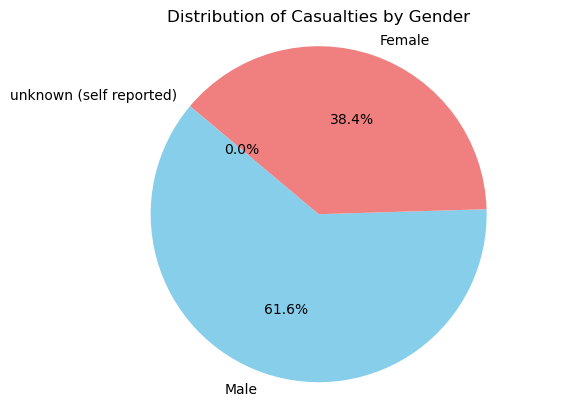

In [6]:
# Analyze distribution of casualties by gender
value_counts = df['sex_of_casualty'].value_counts()
x_labels = [sex_of_casualty[str(val)] for val in value_counts.index]
gender_counts = df['sex_of_casualty'].value_counts()

plt.pie(gender_counts, labels=x_labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.axis('equal')
plt.title('Distribution of Casualties by Gender')
plt.show()


### Gender-Based Casualty Class Analysis

- **Purpose:** Compare the distribution of casualty classes between males and females.

- **Actions:**
    - Separated the data by gender.
    - Calculated value counts for casualty class for each gender.
    - Plotted pie charts to visualize the distribution of casualty classes for males and females.


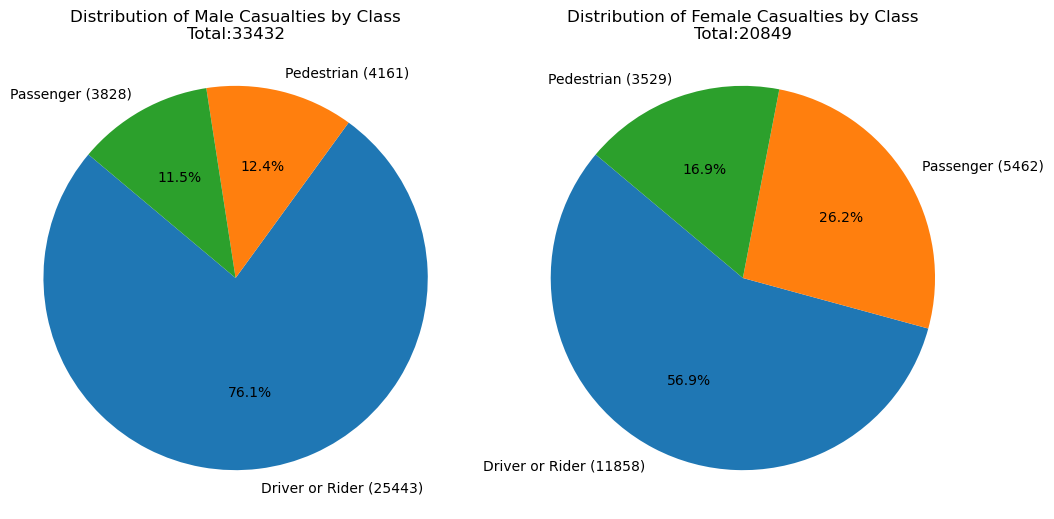

In [7]:
# Separate data by gender
male_data = df[df['sex_of_casualty'] == 1]
female_data = df[df['sex_of_casualty'] == 2]

# Get value counts for casualty class for each gender
male_class_counts = male_data['casualty_class'].value_counts()
female_class_counts = female_data['casualty_class'].value_counts()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart for male casualties
male_labels = [f"{casualty_class[str(k)]} ({v})" for k, v in male_class_counts.items()]
ax1.pie(male_class_counts, labels=male_labels, autopct='%1.1f%%', startangle=140)
ax1.set_title(f'Distribution of Male Casualties by Class\nTotal:{len(male_data)}')

# Plot pie chart for female casualties
female_labels = [f"{casualty_class[str(k)]} ({v})" for k, v in female_class_counts.items()]
ax2.pie(female_class_counts, labels=female_labels, autopct='%1.1f%%', startangle=140)
ax2.set_title(f'Distribution of Female Casualties by Class\nTotal:{len(female_data)}')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax2.axis('equal')

plt.show()


### Age Band and Severity Analysis

- **Purpose:** Examine the severity of casualties across different age bands.

- **Actions:**
    - Grouped the data by age band and severity.
    - Plotted a stacked bar chart to visualize the severity of casualties by age band.
    - Added percentage labels to each bar to show the proportion of each severity level within each age band.


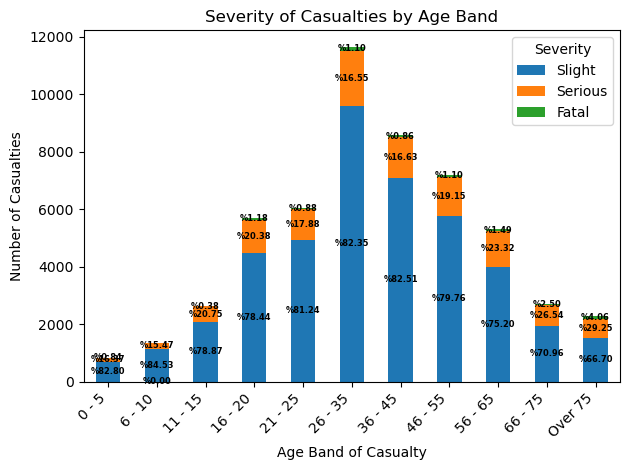

In [8]:
# Analyze severity of casualties by age band
grouped_data = df.groupby(['age_band_of_casualty', 'casualty_severity']).size().unstack(fill_value=0)
grouped_data.columns = [casualty_severity[str(col)] for col in grouped_data.columns]
grouped_data.index = [age_band_of_casualty[str(idx)] for idx in grouped_data.index]
grouped_data = grouped_data.iloc[:, ::-1]

ax = grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Age Band of Casualty')
plt.ylabel('Number of Casualties')
plt.title('Severity of Casualties by Age Band')
plt.legend(title='Severity')
plt.xticks(rotation=45, ha='right')

# Add percentage labels to each bar
sum_of_each_bar = []
for i in range(0, 11):
    sum_of_each_bar.append((ax.patches[i].get_height()) + (ax.patches[i+11].get_height()) + (ax.patches[i+22].get_height()))

for i in range(0, 33):
    p = ax.patches[i]
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'%{100*height/sum_of_each_bar[i%11]:.2f}', (x + width/2, y + height/2), ha='center', va='center', fontsize=6, color='black', weight='bold')

plt.tight_layout()
plt.show()


### Pedestrian Movement and Severity Analysis

- **Purpose:** Investigate the distribution of casualties based on pedestrian movement and severity.

- **Actions:**
    - Filtered the dataset to exclude codes '0' and '9' in pedestrian movement.
    - Grouped the data by pedestrian movement and severity.
    - Plotted a stacked bar chart to visualize the distribution of casualties by pedestrian movement and severity.
    - Added count labels to each bar for better interpretation.

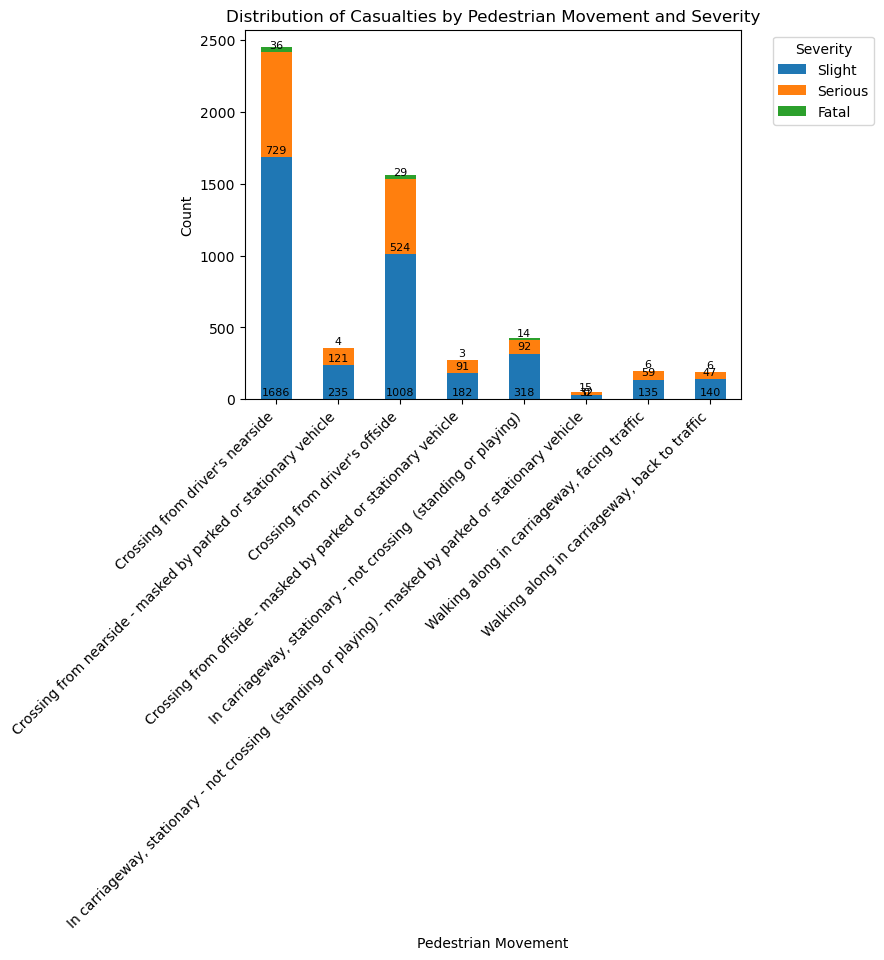

In [9]:
# Analyze distribution of casualties by pedestrian movement and severity
filtered_df = df[~df['pedestrian_movement'].isin([0, 9])]
grouped_data = filtered_df.groupby(['pedestrian_movement', 'casualty_severity']).size().unstack(fill_value=0)
grouped_data.columns = [casualty_severity[str(col)] for col in grouped_data.columns]
grouped_data.index = [pedestrian_movement[str(idx)] for idx in grouped_data.index]
grouped_data = grouped_data.iloc[:, ::-1]

ax = grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Pedestrian Movement')
plt.ylabel('Count')
plt.title('Distribution of Casualties by Pedestrian Movement and Severity')
plt.xticks(rotation=45, ha='right')

# Add labels
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + 50), ha='center', va='center', fontsize=8, color='black')

plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Passenger Distribution Analysis

- **Purpose:** Determine the proportion of casualties who were passengers in cars or buses/coaches.

- **Actions:**
    - Calculated the counts and percentages of casualties who were car passengers and bus/coach passengers.
    - Plotted a pie chart to visualize the proportion of casualties who were passengers in different types of vehicles.

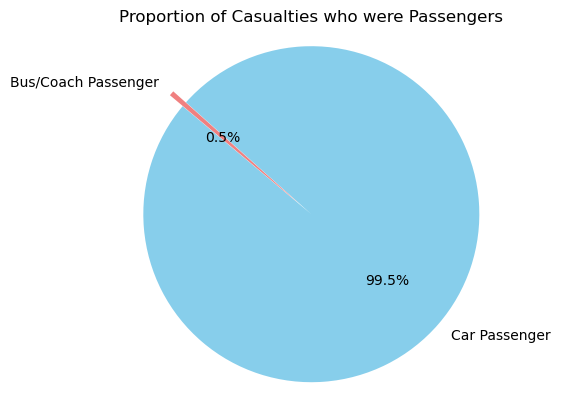

In [10]:
# Analyze proportion of casualties who were passengers
car_passenger_count = df[df['car_passenger'] == 1].shape[0]
bus_coach_passenger_count = df[df['bus_or_coach_passenger'] == 1].shape[0]
total_casualties = len(df)

car_passenger_percentage = (car_passenger_count / total_casualties) * 100
bus_coach_passenger_percentage = (bus_coach_passenger_count / total_casualties) * 100

labels = ['Car Passenger', 'Bus/Coach Passenger']
sizes = [car_passenger_percentage, bus_coach_passenger_percentage]
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion of Casualties who were Passengers')
plt.show()


### Home Area Distribution Analysis

- **Purpose:** Examine the distribution of casualties based on home area type.

- **Actions:**
    - Counted the number of casualties by home area type.
    - Plotted a pie chart to visualize the distribution of casualties by home area type.


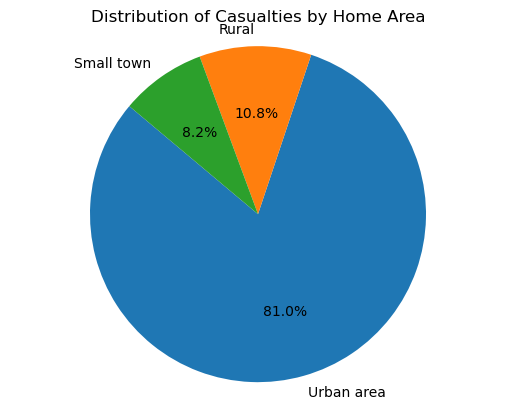

In [11]:
# Analyze distribution of casualties by home area type
value_counts = df['casualty_home_area_type'].value_counts()
x_labels = [casualty_home_area_type[str(val)] for val in value_counts.index]

plt.pie(value_counts, labels=x_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Casualties by Home Area')
plt.show()


### Vehicle Type Distribution Analysis

- **Purpose:** Explore the distribution of casualties by the type of vehicle involved.

- **Actions:**
    - Counted the number of casualties by the type of vehicle.
    - Plotted a bar chart to visualize the distribution of casualties by the type of vehicle involved.


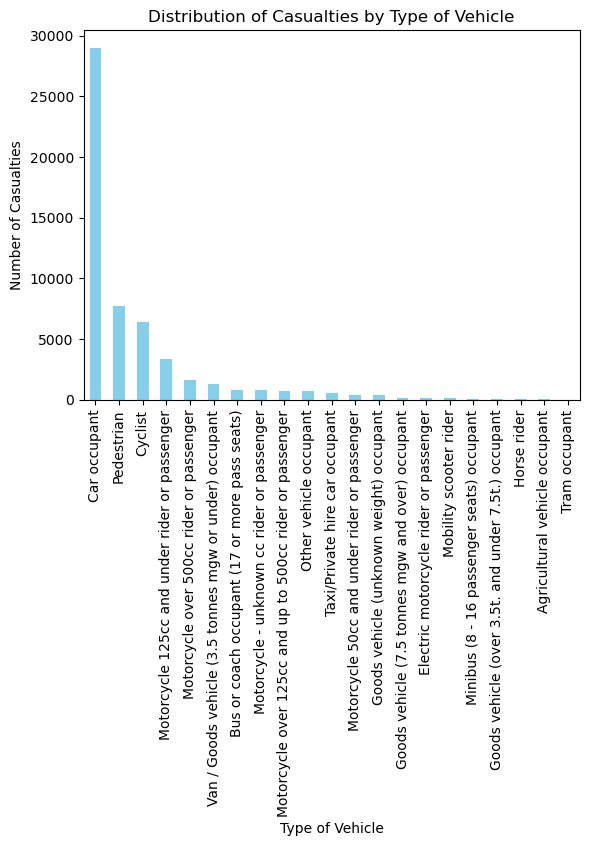

In [12]:
# Analyze distribution of casualties by type of vehicle
vehicle_counts = df['casualty_type'].value_counts()
vehicle_counts.index = [casualty_type[str(idx)] for idx in vehicle_counts.index]

vehicle_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Type of Vehicle')
plt.ylabel('Number of Casualties')
plt.title('Distribution of Casualties by Type of Vehicle')
plt.xticks(rotation=90)
plt.show()


### IMD Decile and Casualty Severity Analysis

- **Purpose:** Investigate the distribution of casualty severity across different IMD (Index of Multiple Deprivation) deciles.

- **Actions:**
    - Grouped the data by IMD decile and casualty severity.
    - Plotted a boxplot to visualize the distribution of casualty severity across IMD deciles.


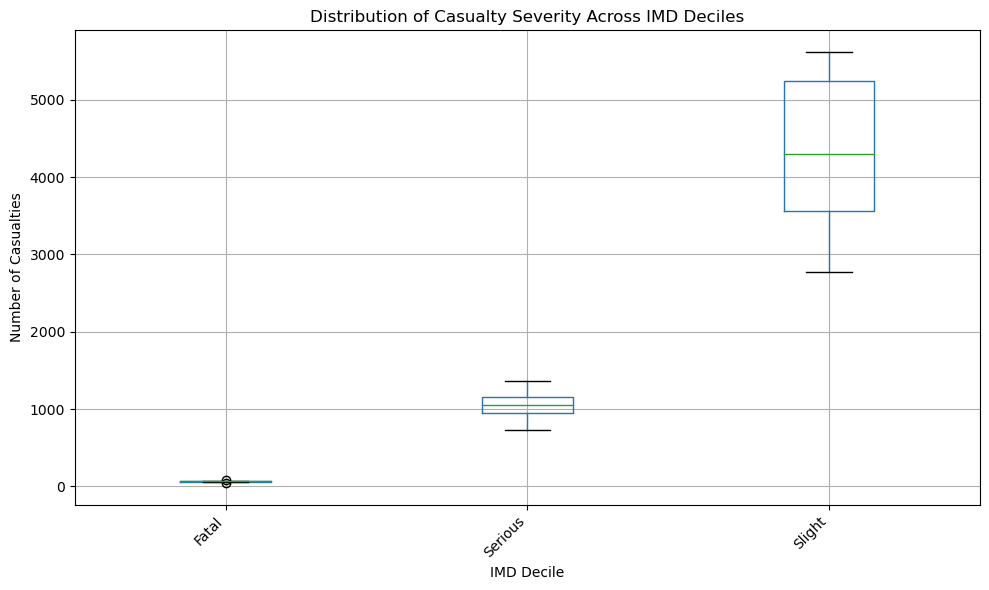

In [13]:
# Analyze distribution of casualty severity across IMD deciles
grouped_data = df.groupby(['casualty_imd_decile', 'casualty_severity']).size().unstack(fill_value=0)
grouped_data.columns = [casualty_severity[str(col)] for col in grouped_data.columns]

plt.figure(figsize=(10, 6))
grouped_data.boxplot()
plt.xlabel('IMD Decile')
plt.ylabel('Number of Casualties')
plt.title('Distribution of Casualty Severity Across IMD Deciles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Pedestrian Location and Movement Analysis

- **Purpose:** Examine the distribution of pedestrian location and movement during accidents.

- **Actions:**
    - Filtered the dataset to exclude codes '0', '9', and '-1' in pedestrian movement and location.
    - Grouped the data by pedestrian location and movement.
    - Plotted a stacked bar chart to visualize the distribution of pedestrian location and movement during accidents.


<Figure size 1000x600 with 0 Axes>

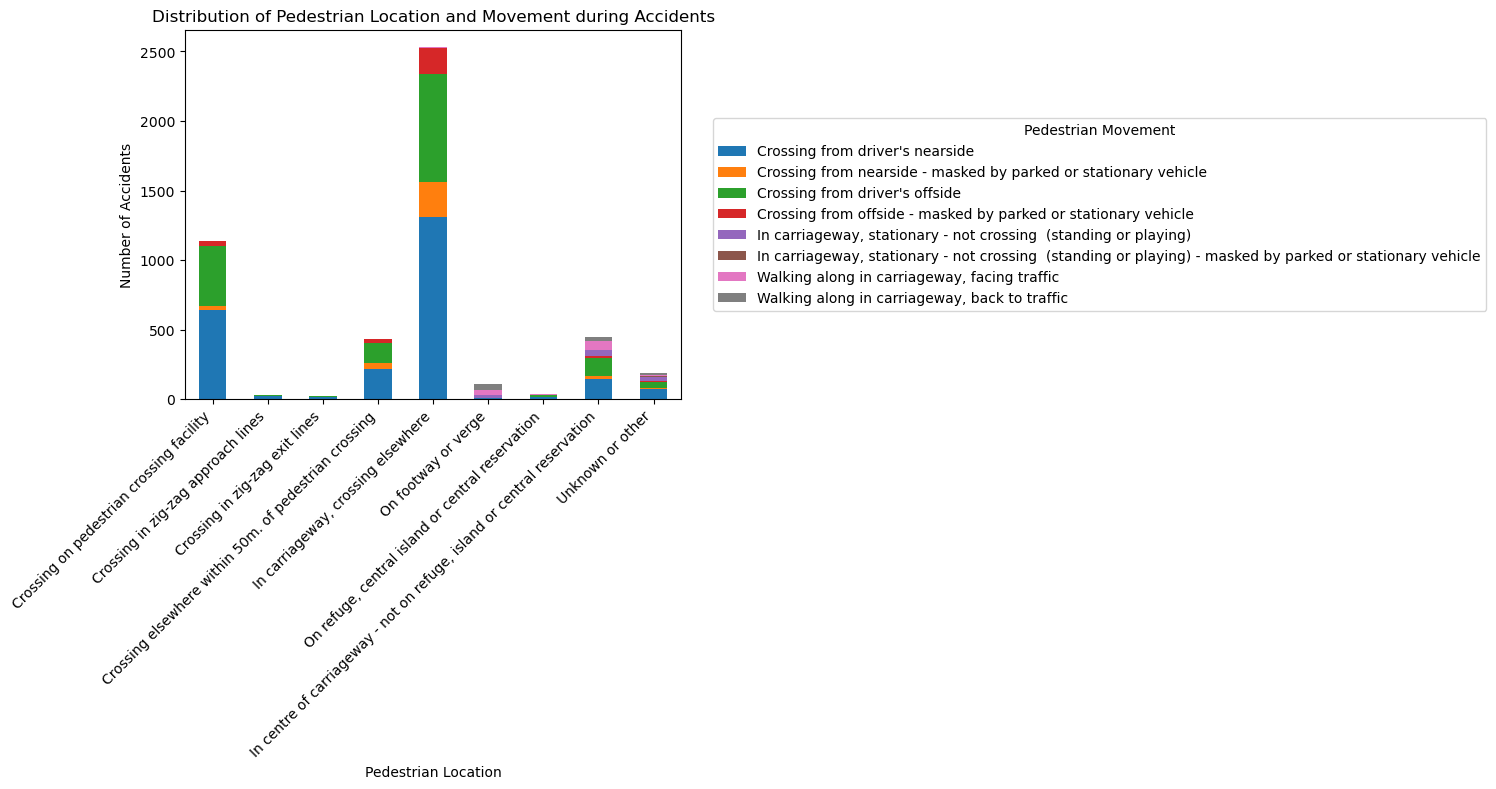

In [14]:
# Analyze distribution of pedestrian location and movement during accidents
filtered_df = df[~df['pedestrian_movement'].isin([0, 9, -1])]
filtered_df = filtered_df[~filtered_df['pedestrian_location'].isin([0, 9, -1])]
grouped_data = filtered_df.groupby(['pedestrian_location', 'pedestrian_movement']).size().unstack(fill_value=0)
grouped_data.index = [pedestrian_location[str(idx)] for idx in grouped_data.index]
grouped_data.columns = [pedestrian_movement[str(col)] for col in grouped_data.columns]

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Pedestrian Location')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Pedestrian Location and Movement during Accidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pedestrian Movement', bbox_to_anchor=(1.05, 0.5), loc='center left', ncol=1)
plt.show()


### LOSA and Casualty Class Analysis

- **Purpose:** Analyze the distribution of casualties across different Lower Layer Super Output Areas (LOSA) by casualty class.

- **Actions:**
    - Merged the dataset with LOSA codes to obtain the LOSA names.
    - Grouped the data by LOSA name and casualty class.
    - Plotted a stacked bar chart to visualize the distribution of casualties across different LOSA by casualty class.


<Figure size 1800x600 with 0 Axes>

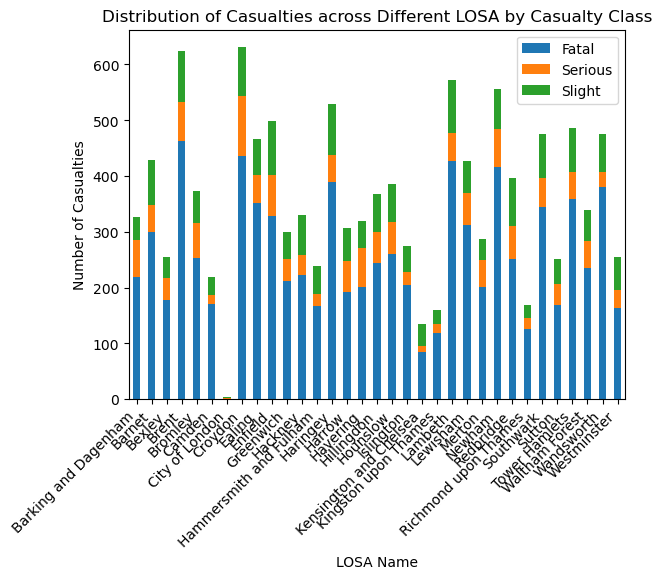

In [15]:
# Merge the dataset with LOSA codes and analyze casualty distribution across different LOSA by casualty class
loca_df = pd.read_csv('LOSA_Codes.csv')
loca_df['Names'] = loca_df['Names'].str[:-5]
merged_df = pd.merge(df, loca_df, left_on='lsoa_of_casualty', right_on='Codes', how='left')

grouped_data = merged_df.groupby(['Names', 'casualty_class']).size().unstack(fill_value=0)
grouped_data.columns = [casualty_severity[str(col)] for col in grouped_data.columns]

plt.figure(figsize=(18, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('LOSA Name')
plt.ylabel('Number of Casualties')
plt.title('Distribution of Casualties across Different LOSA by Casualty Class')
plt.xticks(rotation=45, ha='right')
plt.show()

### Total Casualties by LOSA

- **Purpose:** Calculate the total number of casualties for each Lower Layer Super Output Area (LOSA).

- **Actions:**
    - Summed up the casualties for each LOSA.
    - Converted the Series to a DataFrame.
    - Displayed the total casualties by LOSA.


In [16]:
# Calculate the total number of casualties for each LOSA
grouped_data = grouped_data.sum(axis=1)

# Convert the Series to DataFrame
grouped_data = grouped_data.reset_index()

# Rename the columns if needed
grouped_data.columns = ['Names', 'Counts']

# Display the DataFrame
grouped_data


,Names,Counts
0,Barking and Dagenham,326
1,Barnet,428
2,Bexley,254
3,Brent,624
4,Bromley,374
5,Camden,219
6,City of London,4
7,Croydon,631
8,Ealing,467
9,Enfield,498


### Map Visualization

- **Purpose:** Visualize the distribution of casualties across different locations using a map.

- **Actions:**
    - Used Folium to create an interactive map.
    - Added markers for each location with a popup showing the town name and casualty count.
    - Saved the map as an HTML file for further analysis.


In [17]:
# Function to get latitude and longitude for a town using OpenStreetMap Nominatim API
def get_coordinates(town):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(town)
    if location:
        return location.latitude, location.longitude
    else:
        print(f"Failed to get coordinates for {town}")

df = grouped_data
# Apply the function to each town in the DataFrame to get coordinates
df['Latitude'], df['Longitude'] = zip(*df['Names'].apply(get_coordinates))

# Create a folium map
m = folium.Map(location=[51.5074, -0.1278], zoom_start=9)

# Define a color palette for markers
colors = ['blue', 'green', 'red', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 
          'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black']
# Add markers for each town with popup showing the town name and count
for _, row in df.iterrows():
    town = row['Names']
    frequency = row['Counts']
    color_index = min(frequency // 30, len(colors) - 1)  # Use the color index based on frequency, capped at the length of colors list
    color = colors[color_index]
    popup_text = f"{town} ({frequency})"
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text, icon=folium.Icon(color=color)).add_to(m)
# Display the map
m.save("map.html")  # Save the map as an HTML file
m